In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/bmsAnomalyDetection/application/Anomaly-detection/notebook/data/labelled_data.csv')
pd.set_option('display.max_columns', None)
# df.head()

In [3]:
# print(df.info())
# print()
# print(df.shape)
# print()
# df.describe()
# print()
# for i in df.columns:
#     print(i,'---->',df[i].nunique())

In [4]:
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler


ignore = ['Unnamed: 0','Anomaly_Score','timestamps']

# Initialize the setup
clf1 = setup(data=df,
             target='Anomaly',
             session_id=123,
             train_size=0.7,
             preprocess=True,
             imputation_type='simple',
             categorical_imputation='mode',
             numeric_imputation='mean',
             normalize=True,
             ignore_features=ignore,
             normalize_method='robust',
             combine_rare_levels=True,
             rare_level_threshold=0.1,
             data_split_stratify=True,
             fold_strategy='stratifiedkfold',
             fold=3,
             fold_shuffle=True,
             n_jobs=None,
            #  silent=True,
             fix_imbalance=True,
             fix_imbalance_method=RandomOverSampler(),
             ignore_low_variance=True,
             handle_unknown_categorical=True,
             unknown_categorical_method='least_frequent',
             feature_selection=True,
             feature_selection_method= "classic",
             log_experiment=True,
             experiment_name='anomalyDetection002',
             )

,Description,Value
0,session_id,123
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(17280, 34)"
5,Missing Values,True
6,Numeric Features,20
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
from sklearn import set_config
set_config(display='diagram')


In [6]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Unnamed: 0',
                                                       'Anomaly_Score',
                                                       'timestamps'],
                                      id_columns=['Unnamed: 0'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Anomaly',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categ...
                ('fix_perfect', Remove_100(target='Anomaly')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=123,
                                                    subclass='binary',
                                                    target='Anomaly',
                                                    top_features_to_pick=0.19999999999999996)),
                ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                ('pca', 'passthrough')],
         verbose=False)

In [7]:
X_train = get_config('X_train')
X_test = get_config('X_test')

X_train.to_csv("D:/bmsAnomalyDetection/application/Anomaly-detection/notebook/data/X_train.csv")
X_test.to_csv("D:/bmsAnomalyDetection/application/Anomaly-detection/notebook/data/X_test.csv")

In [8]:
# models()

In [9]:
# Compare models to find the best one
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9755,0.9841,0.6099,0.8613,0.7133,0.7010,0.7128,0.3567
rf,Random Forest Classifier,0.9692,0.9571,0.3900,0.9835,0.5578,0.5450,0.6087,1.7800
et,Extra Trees Classifier,0.9678,0.9422,0.3685,0.9697,0.5334,0.5203,0.5868,0.8767
gbc,Gradient Boosting Classifier,0.9567,0.9721,0.7884,0.5488,0.6463,0.6241,0.6362,5.0000
knn,K Neighbors Classifier,0.9521,0.7550,0.5189,0.5210,0.5198,0.4947,0.4947,5.8700
dummy,Dummy Classifier,0.9500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0367
dt,Decision Tree Classifier,0.9491,0.7273,0.4809,0.4909,0.4852,0.4584,0.4588,0.2167
ada,Ada Boost Classifier,0.9487,0.9746,0.8578,0.4935,0.6261,0.6007,0.6275,1.1700
nb,Naive Bayes,0.8704,0.8287,0.5883,0.2125,0.3122,0.2576,0.2988,0.0433
svm,SVM - Linear Kernel,0.8074,0.0000,0.6611,0.1589,0.2561,0.1908,0.2558,0.1400


In [10]:
select_models= [create_model(i) for i in ['lr','rf','ada','lightgbm']]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9759,0.9858,0.6386,0.8431,0.7268,0.7144,0.7220
1,0.9757,0.9857,0.6188,0.8562,0.7184,0.7060,0.7162
2,0.9749,0.9809,0.5721,0.8846,0.6949,0.6824,0.7001
Mean,0.9755,0.9841,0.6099,0.8613,0.7133,0.7010,0.7128
Std,0.0004,0.0023,0.0279,0.0173,0.0135,0.0135,0.0093


In [11]:
top3_tuned = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9303,0.9182,0.6238,0.3807,0.4728,0.4378,0.4532
1,0.9348,0.9240,0.6584,0.4067,0.5028,0.4700,0.4857
2,0.9469,0.9079,0.5274,0.4711,0.4977,0.4697,0.4706
Mean,0.9373,0.9167,0.6032,0.4195,0.4911,0.4592,0.4698
Std,0.0070,0.0066,0.0554,0.0380,0.0131,0.0151,0.0133


In [12]:
# models(type='ensemble').index.tolist()
ensembled_models = compare_models(include= models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9755,0.9841,0.6099,0.8613,0.7133,0.7010,0.7128,0.4533
rf,Random Forest Classifier,0.9692,0.9571,0.3900,0.9835,0.5578,0.5450,0.6087,3.8167
et,Extra Trees Classifier,0.9678,0.9422,0.3685,0.9697,0.5334,0.5203,0.5868,1.7067
gbc,Gradient Boosting Classifier,0.9567,0.9721,0.7884,0.5488,0.6463,0.6241,0.6362,9.5633
ada,Ada Boost Classifier,0.9487,0.9746,0.8578,0.4935,0.6261,0.6007,0.6275,2.1933


In [13]:
gbc = create_model('gbc', fold=3)
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9767,0.9841,0.6287,0.8699,0.7299,0.7180,0.7284
1,0.9767,0.9816,0.5941,0.9091,0.7186,0.7070,0.7244
2,0.9732,0.9772,0.5522,0.8605,0.6727,0.6595,0.6771
Mean,0.9755,0.9810,0.5917,0.8798,0.7071,0.6948,0.7100
Std,0.0016,0.0028,0.0313,0.0211,0.0247,0.0254,0.0233


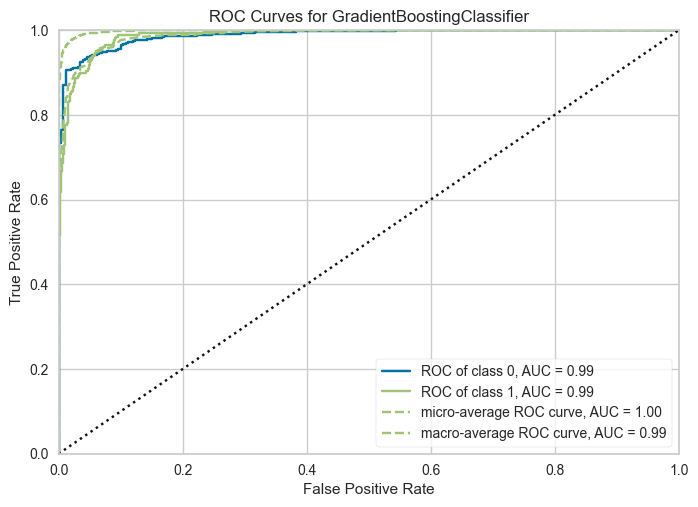

In [14]:
# Analyse Model

plot_model(tuned_gbc)

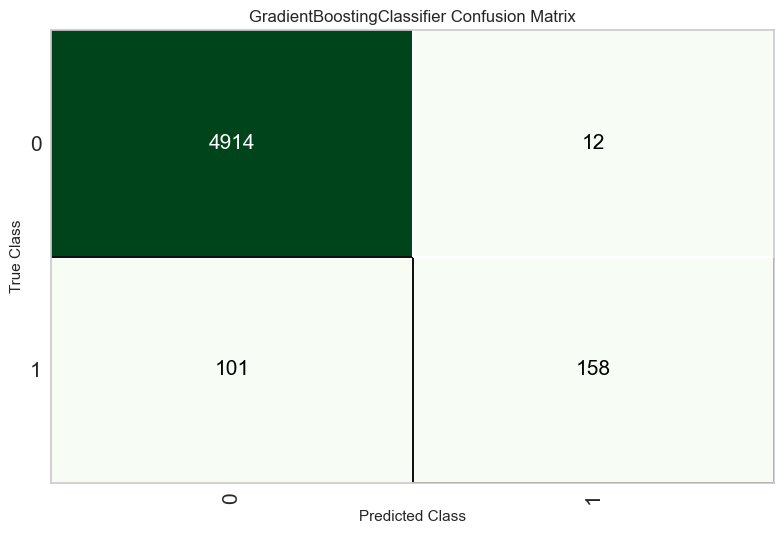

In [15]:
plot_model(tuned_gbc,plot = 'confusion_matrix')

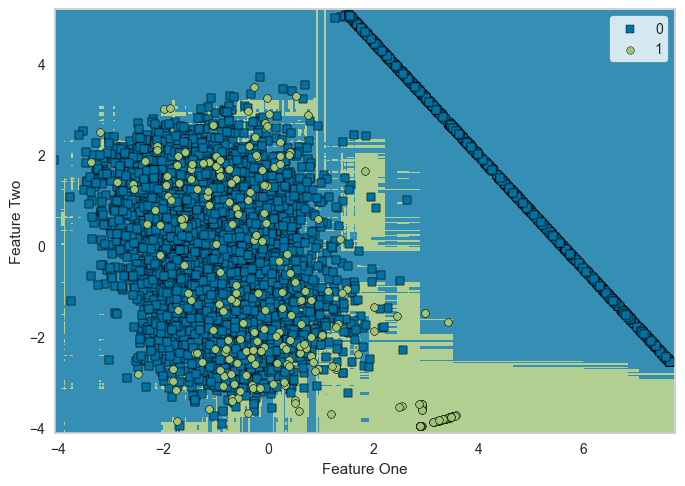

In [16]:
plot_model(tuned_gbc, plot = 'boundary')

In [17]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
pred_holdout = predict_model(tuned_ada)

NameError: name 'tuned_ada' is not defined

In [19]:
from pycaret.classification import get_leaderboard
leaderboard = get_leaderboard()

In [20]:
leaderboard

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(DataTypes_Auto_infer(categorical_features=[],...",0.7914,0.7952,0.6578,0.1466,0.2398,0.1721,0.2384
1,K Neighbors Classifier,"(DataTypes_Auto_infer(categorical_features=[],...",0.9521,0.7550,0.5189,0.5210,0.5198,0.4947,0.4947
2,Naive Bayes,"(DataTypes_Auto_infer(categorical_features=[],...",0.8704,0.8287,0.5883,0.2125,0.3122,0.2576,0.2988
3,Decision Tree Classifier,"(DataTypes_Auto_infer(categorical_features=[],...",0.9491,0.7273,0.4809,0.4909,0.4852,0.4584,0.4588
4,SVM - Linear Kernel,"(DataTypes_Auto_infer(categorical_features=[],...",0.8074,0.0000,0.6611,0.1589,0.2561,0.1908,0.2558
5,Ridge Classifier,"(DataTypes_Auto_infer(categorical_features=[],...",0.8035,0.0000,0.6462,0.1532,0.2476,0.1814,0.2447
6,Random Forest Classifier,"(DataTypes_Auto_infer(categorical_features=[],...",0.9692,0.9571,0.3900,0.9835,0.5578,0.5450,0.6087
7,Quadratic Discriminant Analysis,"(DataTypes_Auto_infer(categorical_features=[],...",0.1520,0.5044,0.8958,0.0505,0.0955,0.0009,0.0088
8,Ada Boost Classifier,"(DataTypes_Auto_infer(categorical_features=[],...",0.9487,0.9746,0.8578,0.4935,0.6261,0.6007,0.6275


In [21]:
# Tune the Adaboost Classifier model
# import warnings
# warnings.filterwarnings('ignore')
tuned_ada_model = tune_model(best_model,n_iter=3,optimize='Accuracy',verbose=True)

NameError: name 'best_model' is not defined

In [22]:
# Access transformed training data
transformed_train_data = get_config('X_train')
transformed_test_data = get_config('X_test')

In [23]:
train_predictions = tuned_ada.predict(transformed_train_data)
test_predictions = tuned_ada.predict(transformed_test_data)

NameError: name 'tuned_ada' is not defined

In [24]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(get_config('y_train'),train_predictions),4))
print(round(accuracy_score(get_config('y_test'),test_predictions),4))


NameError: name 'train_predictions' is not defined

In [25]:
predict_model(tuned_ada)

NameError: name 'tuned_ada' is not defined

In [26]:
import mlflow

mlflow.set_experiment(experiment_name='training_experiment_1')

with mlflow.start_run():
    clf1 = setup(data=df,target='Anomaly',session_id=123,train_size=0.7,
             preprocess=True,
             imputation_type='simple',
             categorical_imputation='mode',
             numeric_imputation='mean',
             normalize=True,
             ignore_features=ignore,
             normalize_method='robust',
             combine_rare_levels=True,
             rare_level_threshold=0.1,
             data_split_stratify=True,
             fold_strategy='stratifiedkfold',
             fold=3,
             fold_shuffle=True,
             n_jobs=None,
             silent=True,fix_imbalance=True,
             fix_imbalance_method=RandomOverSampler(),
             ignore_low_variance=True,
             handle_unknown_categorical=True,
             unknown_categorical_method='least_frequent',
             feature_selection=True,
             feature_selection_method= "classic",
             )
    best = compare_models(include=['lightgbm','ada','rf'])
    mlflow.end_run()

2024/09/05 15:10:49 INFO mlflow.tracking.fluent: Experiment with name 'training_experiment_1' does not exist. Creating a new experiment.


Exception: Run with UUID 5b3f0836c3db4c7da027e89362146aaf is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [ ]:
! mlflow ui